In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [2]:
df=pd.read_csv(r"C:\Users\ibrah\Datasets\sample_submission\sample_submission.csv")
test_data=pd.read_csv(r"C:\Users\ibrah\Datasets\sample_submission\test.csv")
train=pd.read_csv(r"C:\Users\ibrah\Datasets\sample_submission\train.csv")
original=pd.read_csv(r"C:\Users\ibrah\Datasets\sample_submission\orginal.csv")

In [3]:
original.rename(columns={"Whole_weight":"Whole weight","Viscera_weight":"Whole weight.2","Shucked_weight":"Whole weight.1","Shell_weight":"Shell weight"},inplace=True)

In [4]:
original

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
train

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [6]:
concad_df = pd.concat([original, train], ignore_index=True)


In [7]:
train=concad_df

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94792 entries, 0 to 94791
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              94792 non-null  int64  
 1   Sex             94792 non-null  object 
 2   Length          94792 non-null  float64
 3   Diameter        94792 non-null  float64
 4   Height          94792 non-null  float64
 5   Whole weight    94792 non-null  float64
 6   Whole weight.1  94792 non-null  float64
 7   Whole weight.2  94792 non-null  float64
 8   Shell weight    94792 non-null  float64
 9   Rings           94792 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 7.2+ MB


# Data Wrangling

In [9]:
plot_train=train.drop(["id","Sex","Rings"],axis=1)

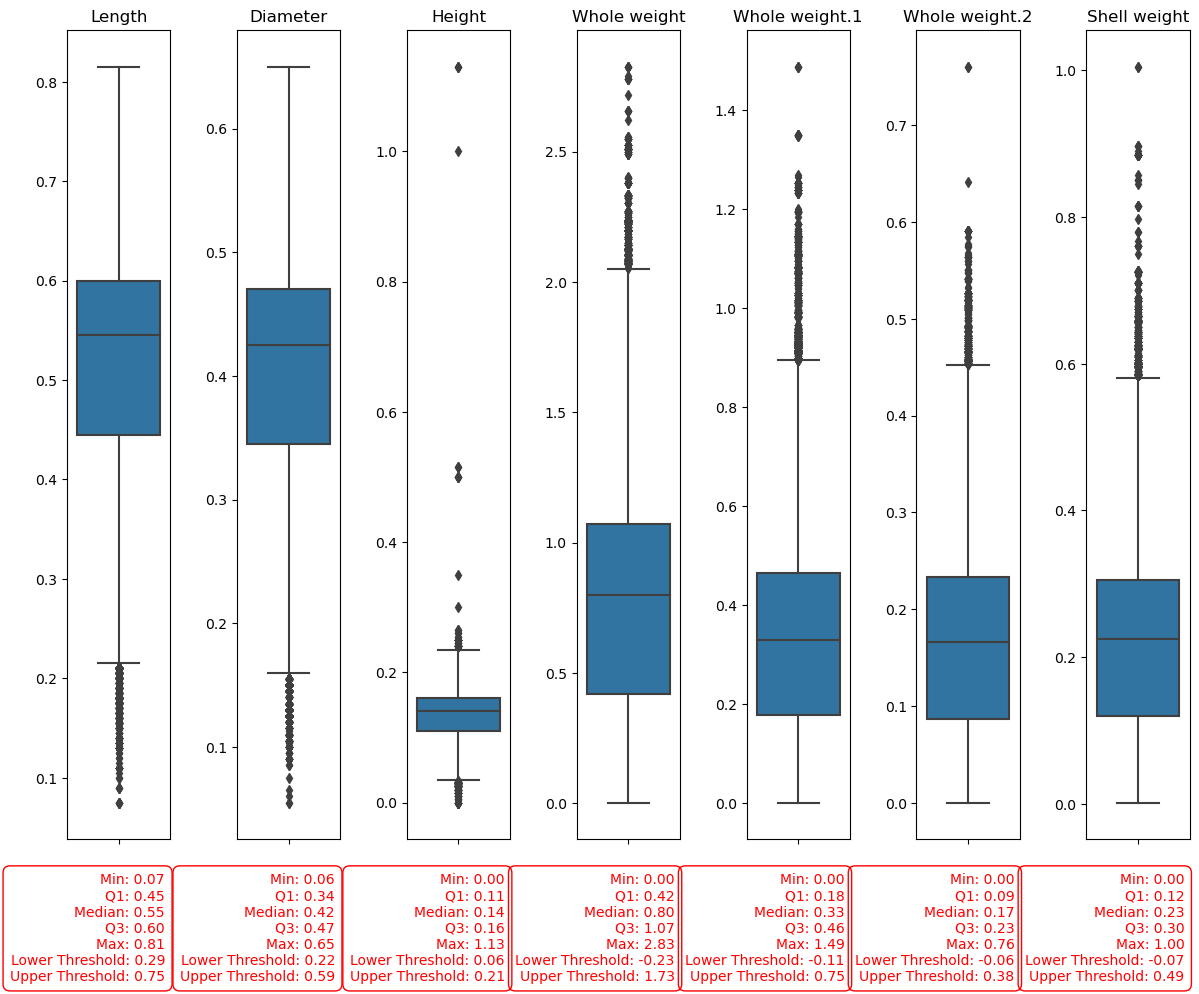

In [10]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(plot_train.columns):
    plt.subplot(1, len(plot_train.columns), i + 1)
    sns.boxplot(y=plot_train[column])
    plt.title(column)
    plt.ylabel(None)  # Y eksenine isim vermemek için

    # Betimsel istatistiklerin değerlerini ve eşik değerlerini ekleme
    stats = plot_train[column].describe()
    iqr = stats['75%'] - stats['25%']
    lower_threshold = stats['25%'] - iqr
    upper_threshold = stats['75%'] + iqr
    stats_str = f"Min: {stats['min']:.2f}\nQ1: {stats['25%']:.2f}\nMedian: {stats['50%']:.2f}\nQ3: {stats['75%']:.2f}\nMax: {stats['max']:.2f}\nLower Threshold: {lower_threshold:.2f}\nUpper Threshold: {upper_threshold:.2f}"

    plt.text(0.95, -0.11, stats_str, verticalalignment='center', horizontalalignment='right',
             transform=plt.gca().transAxes, color='red', fontsize=10, bbox=dict(facecolor='none', edgecolor='red', boxstyle='round,pad=0.5'))

plt.tight_layout()

# Grafiği gösterme
plt.show()

# outlier clearance

### length outlier

In [21]:
threshold_2 =0.21

# DataFrame'den aykırı değerleri  (# Outliers from DataFrame)
cleaned_df_2 =train[train['Length'] < threshold_2]

print(f"counts:{cleaned_df_2.value_counts().sum()}")

counts:1342


### Diametter outlier

In [22]:
threshold_3 =0.19 #eşik değer

# DataFrame'den aykırı değerleri  (# Outliers from DataFrame)
cleaned_df_3 =train[train['Diameter'] < threshold_3]

print(f"counts:{cleaned_df_3.value_counts().sum()}")

counts:2992


### Height outlier

In [23]:

threshold_1 =0.215
threshold_1_1=0.06

# DataFrame'den aykırı değerleri  (# Outliers from DataFrame)
cleaned_df_1 =train[train['Height'] > threshold_1]
cleaned_df_1_1=train[train['Height'] < threshold_1_1]
print(f"counts:{cleaned_df_1.value_counts().sum()}")

counts:662


### Weights outlier

In [27]:
threshold_4 =1.8

# DataFrame'den aykırı değerleri  (# Outliers from DataFrame)
cleaned_df_4 =train[train['Whole weight'] > threshold_4]

print(f"counts:{cleaned_df_4.value_counts().sum()}")

counts:1950


In [28]:

threshold_5 =0.88

# DataFrame'den aykırı değerleri  (# Outliers from DataFrame)
cleaned_df_5 =train[train['Whole weight.1'] > threshold_5]

print(f"counts:{cleaned_df_5.value_counts().sum()}")

counts:1143


In [29]:
threshold_6 =0.46

# DataFrame'den aykırı değerleri  (# Outliers from DataFrame)
cleaned_df_6 =train[train['Whole weight.2'] > threshold_6]

print(f"counts:{cleaned_df_6.value_counts().sum()}")

counts:416


In [30]:
threshold_7 =0.58

# DataFrame'den aykırı değerleri  (# Outliers from DataFrame)
cleaned_df_7 =train[train['Shell weight'] > threshold_7]

print(f"counts:{cleaned_df_7.value_counts().sum()}")

counts:736


In [31]:
cleaned_df_sum = cleaned_df_1.value_counts().sum()+ cleaned_df_2.value_counts().sum()+ cleaned_df_3.value_counts().sum()+ cleaned_df_4.value_counts().sum()+ cleaned_df_5.value_counts().sum()+ cleaned_df_6.value_counts().sum()+cleaned_df_7.value_counts().sum()


print(f"Sum outlier drop data: {cleaned_df_sum}")

Sum outlier drop data: 9241


# drop outlier values train data

In [32]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,94792.0,43402.559087,27071.345725,0.0000,19520.7500,43218.5000,66916.2500,90614.0000
Length,94792.0,0.517402,0.118308,0.0750,0.4450,0.5450,0.6000,0.8150
Diameter,94792.0,0.401952,0.098088,0.0550,0.3450,0.4250,0.4700,0.6500
Height,94792.0,0.135643,0.038193,0.0000,0.1100,0.1400,0.1600,1.1300
Whole weight,94792.0,0.790785,0.459231,0.0020,0.4195,0.7995,1.0725,2.8255
Whole weight.1,94792.0,0.341597,0.205267,0.0010,0.1775,0.3300,0.4645,1.4880
Whole weight.2,94792.0,0.169914,0.101334,0.0005,0.0865,0.1660,0.2330,0.7600
Shell weight,94792.0,0.226468,0.130639,0.0015,0.1200,0.2250,0.3050,1.0050
Rings,94792.0,9.707233,3.178704,1.0000,8.0000,9.0000,11.0000,29.0000


In [33]:
train.drop(train[train['Height'] > threshold_1].index, axis=0, inplace=True)
train.drop(train[train['Height'] < threshold_1_1].index, axis=0, inplace=True)
train.drop(train[train['Length'] < threshold_2].index, axis=0, inplace=True)
train.drop(train[train['Diameter'] < threshold_3].index, axis=0, inplace=True)
train.drop(train[train['Whole weight'] > threshold_4].index, axis=0, inplace=True)
train.drop(train[train['Whole weight.1'] > threshold_5].index, axis=0, inplace=True)
train.drop(train[train['Whole weight.2'] > threshold_6].index, axis=0, inplace=True)
train.drop(train[train['Shell weight'] > threshold_7].index, axis=0, inplace=True)


In [34]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,88746.0,43383.745093,27052.811521,0.0000,19510.2500,43181.5000,66865.7500,90614.0000
Length,88746.0,0.522877,0.102319,0.2200,0.4550,0.5450,0.5950,0.8150
Diameter,88746.0,0.406350,0.085331,0.1900,0.3500,0.4250,0.4700,0.6500
Height,88746.0,0.136640,0.032847,0.0600,0.1150,0.1400,0.1600,0.2150
Whole weight,88746.0,0.784447,0.407951,0.0295,0.4470,0.8035,1.0570,1.7995
Whole weight.1,88746.0,0.338587,0.181831,0.0115,0.1895,0.3315,0.4585,0.8795
Whole weight.2,88746.0,0.168889,0.091446,0.0005,0.0930,0.1670,0.2285,0.4600
Shell weight,88746.0,0.225014,0.116347,0.0100,0.1300,0.2280,0.3000,0.5800
Rings,88746.0,9.785286,3.013773,1.0000,8.0000,9.0000,11.0000,29.0000


###  Encoding

In [481]:
# 'Sex' sütununu one-hot encode etmek için get_dummies() fonksiyonunu kullanalım
#encoded_sex = pd.get_dummies(train['Sex'], prefix='Sex')

# Sonuçları orijinal veri çerçevesine ekleyelim
#train= pd.concat([train, encoded_sex], axis=1)

In [482]:
# 'Sex' sütununu one-hot encode etmek için get_dummies() fonksiyonunu kullanalım
#encoded_sex = pd.get_dummies(test_data['Sex'], prefix='Sex')

# Sonuçları orijinal veri çerçevesine ekleyelim
#test_data= pd.concat([test_data, encoded_sex], axis=1)


In [35]:
train['Sex'] = train['Sex'].map({'M': 1.0, 'F': 1.5,'I':0.0})
#M : 1 | F: 0 | I : 2

In [36]:
test_data['Sex'] = test_data['Sex'].map({'M': 1.0, 'F': 1.5,'I':0.0})

### drop sex columns (optional)

In [37]:
'''train.drop("id", axis=1, inplace=True)
test_data.drop("id", axis=1, inplace=True)'''

'train.drop("id", axis=1, inplace=True)\ntest_data.drop("id", axis=1, inplace=True)'

In [38]:
train

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,1.5,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
94787,90610,1.0,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
94788,90611,1.0,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
94789,90612,0.0,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
94790,90613,0.0,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [39]:
'''train.replace({True: 1, False: 0}, inplace=True)
test_data.replace({True: 1, False: 0}, inplace=True)
'''

'train.replace({True: 1, False: 0}, inplace=True)\ntest_data.replace({True: 1, False: 0}, inplace=True)\n'

# Correlation matris 

In [40]:
correlation_matrix = train.corr()

In [41]:
correlation_matrix

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,1.000000,0.000270,0.001762,0.000815,-0.000709,-0.000297,-0.001828,-0.002187,-0.000550,-0.003202
Sex,0.000270,1.000000,0.622878,0.631750,0.622182,0.627283,0.591131,0.619834,0.625725,0.471997
Length,0.001762,0.622878,1.000000,0.987111,0.910294,0.947491,0.925500,0.922704,0.923179,0.564865
Diameter,0.000815,0.631750,0.987111,1.000000,0.915257,0.948819,0.922380,0.922919,0.930068,0.580575
Height,-0.000709,0.622182,0.910294,0.915257,1.000000,0.914433,0.868171,0.893333,0.918099,0.628113
Whole weight,-0.000297,0.627283,0.947491,0.948819,0.914433,1.000000,0.968646,0.971156,0.962762,0.577660
Whole weight.1,-0.001828,0.591131,0.925500,0.922380,0.868171,0.968646,1.000000,0.942542,0.904323,0.462701
Whole weight.2,-0.002187,0.619834,0.922704,0.922919,0.893333,0.971156,0.942542,1.000000,0.931202,0.545118
Shell weight,-0.000550,0.625725,0.923179,0.930068,0.918099,0.962762,0.904323,0.931202,1.000000,0.661985
Rings,-0.003202,0.471997,0.564865,0.580575,0.628113,0.577660,0.462701,0.545118,0.661985,1.000000


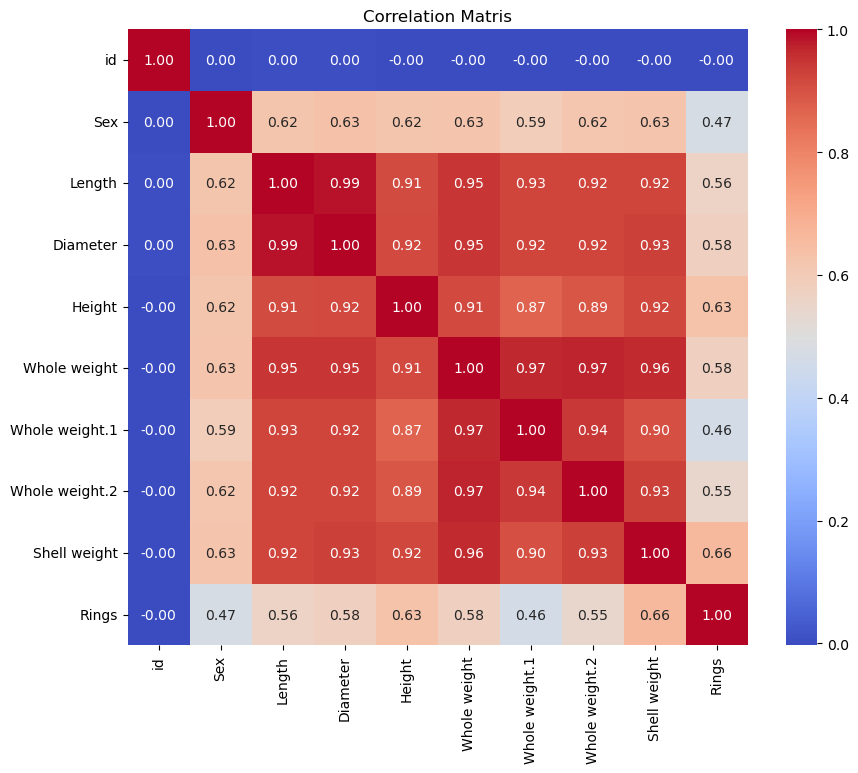

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matris')
plt.show()

In [43]:
covariance_matrix = train.cov()
covariance_matrix

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,7.318546e+08,4.541685,4.878300,1.880503,-0.629835,-3.279907,-8.989806,-5.411218,-1.732224,-261.093304
Sex,4.541685e+00,0.386185,0.039606,0.033500,0.012700,0.159027,0.066796,0.035224,0.045241,0.883990
Length,4.878300e+00,0.039606,0.010469,0.008618,0.003059,0.039549,0.017219,0.008633,0.010990,0.174185
Diameter,1.880503e+00,0.033500,0.008618,0.007281,0.002565,0.033029,0.014311,0.007202,0.009234,0.149305
Height,-6.298350e-01,0.012700,0.003059,0.002565,0.001079,0.012253,0.005185,0.002683,0.003509,0.062178
Whole weight,-3.279907e+00,0.159027,0.039549,0.033029,0.012253,0.166424,0.071852,0.036230,0.045696,0.710217
Whole weight.1,-8.989806e+00,0.066796,0.017219,0.014311,0.005185,0.071852,0.033062,0.015672,0.019131,0.253559
Whole weight.2,-5.411218e+00,0.035224,0.008633,0.007202,0.002683,0.036230,0.015672,0.008362,0.009907,0.150233
Shell weight,-1.732224e+00,0.045241,0.010990,0.009234,0.003509,0.045696,0.019131,0.009907,0.013537,0.232120
Rings,-2.610933e+02,0.883990,0.174185,0.149305,0.062178,0.710217,0.253559,0.150233,0.232120,9.082829


# import for model 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn.linear_model as lm
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline

# Features selecting and train test split function 

In [46]:
features=['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']
# Train data to train 
X = train[features]
y = train["Rings"]

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.15, random_state=0) 

# Train and Predict with all regression

### Random Forest Regression train and predict

In [386]:
# Random Forest Regressor modelini oluşturalım
model = RandomForestRegressor()
model_1 = RandomForestRegressor(n_estimators=50, random_state=100)
model_2 = RandomForestRegressor(n_estimators=60,max_depth=5,criterion="poisson", random_state=0)
model_3 = RandomForestRegressor(n_estimators=200, random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

In [387]:
# Modeli eğitelim
model.fit(X_train, y_train)

# Model predict
random_pred=model.predict(X_test)

In [ ]:
'''for i in range(models):
    # fit
    i.fit(X_train,y_train)
    #predict
    i.predict(X_train,_y_train)
'''

### Linear Regression train and predict

In [493]:
linear_model=lm.LinearRegression()

#fit
linear_model.fit(X_train,y_train)

#predict
lm_pred=linear_model.predict(X_test)

### Support Vector Regression train and predict

In [388]:
svr_model = SVR(kernel='rbf', C=100, gamma='auto')  # RBF core utilisation

# Fit
svr_model.fit(X_train, y_train)

#predict
y_test_pred = svr_model.predict(X_test)

### Lasso Regression train and predict

In [68]:
# Model kurma
lasso_model = Lasso(alpha=0.1, max_iter=10000)
# fit
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

### Ridge Regression train and predict

In [69]:
ridge_model = Ridge(alpha=1.0)  # alpha, düzenleme parametresidir (lambda)
#Fit
ridge_model.fit(X_train, y_train)
#predict
ridge_pred=ridge_model.predict(X_test)


### Elastic Net  train and predict

In [70]:
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha ve l1_ratio parametreleri seçilir

# Fit
elastic_net_model.fit(X_train, y_train)
#Predict 
elastic_net_model_pred=elastic_net_model.predict(X_test)


### Decission Tree Regression

In [71]:
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(X_train, y_train)
# Predict 
iowa_model_pred=iowa_model.predict(X_test)

### TweedieRegression

In [72]:
Tweedie_reg = TweedieRegressor(power=1, alpha=0.5, link='log')
#fit model
Tweedie_reg.fit(X_train, y_train)
#predict
Tweedie_reg_pred=Tweedie_reg.predict(X_test)


### Polinominal regression

In [73]:
poly = PolynomialFeatures(degree=2)

X_test_poly = poly.fit_transform(X_test)
X_train_poly = poly.fit_transform(X_train)


# create linear model
model_1 = lm.LinearRegression()

# Polinominal regression fitting
model_1.fit(X_train_poly, y_train)

# predict
pol_pred = model_1.predict(X_test_poly)


### SGD Regression

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Test verilerini ölçeklendirme

# SGDRegressor create
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Model fit
sgd_model.fit(X_train_scaled, y_train)

# Predict
SGD_pred = sgd_model.predict(X_test_scaled) 


### Voting Regression

In [75]:
# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 =lm.LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)
voting_pred=ereg.predict(X_test)

### Neural Network regression

In [76]:
from tensorflow.keras.layers import LeakyReLU
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

# Artificial neural network modelling
model2 = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),  # Tanh aktivasyon fonksiyonu
    Dense(32, activation=LeakyReLU(alpha=0.1)),  # LeakyReLU aktivasyon fonksiyonu
    Dense(1)  # Çıkış katmanı
])
#model compilation
from keras.optimizers import RMSprop

model2.compile(optimizer=RMSprop(), loss='mse')

# fit
model2.fit(X_train_scaled1, y_train, epochs=50, batch_size=32, verbose=0)
#predict
neural_network_pred = model.predict(X_test_scaled1)


C:\Users\ibrah\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\ibrah\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### XGBoost regression

In [77]:
# XGBoost regresyon modeli oluşturma
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Modeli eğitme
xgb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
XGBoost_pred = xgb_model.predict(X_test)

### Gradient Boosting Regressor

In [429]:
# Initialize the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(
    n_estimators=1000, 
    learning_rate=0.1, 
    max_depth=5, 
    min_samples_split=13,
    min_samples_leaf=5,
    max_features='log2',
    random_state=42
)

# Create a pipeline
gb_reg_pipeline = make_pipeline(StandardScaler(),gb_reg)

# Train the model
gb_reg_pipeline.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train = gb_reg_pipeline .predict(X_train)
y_pred_test = gb_reg_pipeline .predict(X_test)

# Calculate RMSLE
gb_train_rmsle = root_mean_squared_log_error(y_train, y_pred_train)
gb_test_rmsle = root_mean_squared_log_error(y_test, y_pred_test)

# Print the results
print(f"Train RMSLE: {gb_train_rmsle}")
print(f"Test RMSLE: {gb_test_rmsle}")

Train RMSLE: 0.1308314077110554
Test RMSLE: 0.1469244202090972


In [451]:
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(
    n_estimators=1000, 
    learning_rate=0.1, 
    max_depth=5, 
    min_samples_split=13,
    min_samples_leaf=5,
    max_features='log2',
    random_state=42
)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Linear Regression
lr_reg = lm.LinearRegression()

# XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)

# Ensemble model
estimators = [('GradientBoosting', gb_reg), ('RandomForest', rf_reg), ('LinearRegression', lr_reg), ('XGBoost', xgb_reg)]
ensemble_model = StackingRegressor(estimators=estimators, final_estimator=lm.LinearRegression())

# Modeli eğitme
ensemble_model.fit(X_train, y_train)

# Tahminler
y_pred_train_ensemble = ensemble_model.predict(X_train)
y_pred_test_ensemble = ensemble_model.predict(X_test)

# RMSLE hesaplayın
ensemble_train_rmsle = root_mean_squared_log_error(y_train, y_pred_train_ensemble)
ensemble_test_rmsle = root_mean_squared_log_error(y_test, y_pred_test_ensemble)

# Sonuçları yazdırın
print(f"Train RMSLE (Ensemble): {ensemble_train_rmsle}")
print(f"Test RMSLE (Ensemble): {ensemble_test_rmsle}")


Train RMSLE (Ensemble): 0.1181949302046723
Test RMSLE (Ensemble): 0.14685862821759849


## RMSLE root mean squered log error Function 

In [310]:
def root_mean_squared_log_error(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    rmsle = np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))
    return rmsle

# Regressions RMSLE (Root mean score log error) score test code

### Random Forest regression RMSLE

In [389]:
#randomforest no estimors 
rmsle = root_mean_squared_log_error(y_test,random_pred)
print("RMSLE:", rmsle)

RMSLE: 0.15195993932496032


In [394]:
#X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2, random_state=0) 

def score_model(model, X_t=X_train, X_v=X_test, y_t=y_train, y_v=y_test):#X_v:X_valid , y_v:y_valid 
    model.fit(X_t, y_t)
    randomforest_preds = model.predict(X_v)
    rmsle = root_mean_squared_log_error(y_test, randomforest_preds)
    return rmsle
    

In [395]:
#forest regression other options
for i in range (0,len(models)):
    score_model(models[i])
    print(models[i],"RMSLE:", rmsle)
    

RandomForestRegressor(n_estimators=50, random_state=100) RMSLE: 0.15195993932496032
RandomForestRegressor(criterion='poisson', max_depth=5, n_estimators=60,
                      random_state=0) RMSLE: 0.15195993932496032
RandomForestRegressor(n_estimators=200, random_state=0) RMSLE: 0.15195993932496032


KeyboardInterrupt: 

### Linear regression RMSLE

In [494]:
#linear model regression
rmsle = root_mean_squared_log_error(y_test, lm_pred)
print("RMSLE:", rmsle)


RMSLE: 0.161553882275627


### Support regression RMSLE

In [86]:
#Support Vector Regression
rmsle = root_mean_squared_log_error(y_test, y_test_pred)
print("RMSLE:", rmsle)

RMSLE: 0.15659673712395414


### Losso regression RMSLE

In [87]:
#Losso Vector Regression

    
rmsle = root_mean_squared_log_error(y_test, lasso_pred)
print("RMSLE:", rmsle)

RMSLE: 0.20653120019454776


### Ridge regression RMSLE

In [88]:
#Ridge Vector Regression
rmsle = root_mean_squared_log_error(y_test, ridge_pred)
print("RMSLE:", rmsle)

RMSLE: 0.16477545676221309


C:\Users\ibrah\AppData\Local\Temp\ipykernel_16748\2079818201.py:3: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))


### Elastic Net  RMSLE

In [449]:
#Elastic Net Regression
rmsle = root_mean_squared_log_error(y_test, elastic_net_model_pred)
print("RMSLE:", rmsle)

NameError: name 'elastic_net_model_pred' is not defined

### Decission Tree RMSLE

In [89]:
#Decission Tree Regression
rmsle = root_mean_squared_log_error(y_test, iowa_model_pred)
print("RMSLE:", rmsle)

RMSLE: 0.21636975391156882


### Twedie Regression RMSLE

In [90]:
rmsle = root_mean_squared_log_error(y_test, Tweedie_reg_pred)
print("RMSLE:", rmsle)

RMSLE: 0.20813050495091964


### Polinominal Regression RMSLE

In [91]:
rmsle = root_mean_squared_log_error(y_test, pol_pred)
print("RMSLE:", rmsle)

RMSLE: 0.15727201127558244


### SGD Regression RMSLE

In [85]:
rmsle = root_mean_squared_log_error(y_test, SGD_pred)
print("RMSLE:", rmsle)

RMSLE: 0.1671621981076328


### Voting Regression RMSLE

In [86]:
rmsle = root_mean_squared_log_error(y_test, voting_pred)
print("RMSLE:", rmsle)

RMSLE: 0.15289575065689162


### Naural Network Regression RMSLE


In [87]:
rmsle = root_mean_squared_log_error(y_test, neural_network_pred)
print("RMSLE:", rmsle)

NameError: name 'neural_network_pred' is not defined

***Decission tree regression score is better than from other regression model***

# Optimization

### One Hot Encode must start or it won't work 

In [450]:
#Our libraries required for optimisation are as follows:
import optuna
import optuna.integration.lightgbm as lgb
from optuna.integration import LightGBMPruningCallback


In [47]:
features1=['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']
X = train[features1]
y = train["Rings"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [497]:
import lightgbm as lgb
import optuna
from sklearn.metrics import mean_squared_log_error

# Optuna ile hiperparametre optimizasyonu için objective fonksiyonu
def objective(trial):
    # Veri setini yükleyin
    data = lgb.Dataset(X_train, label=y_train)
    
    # LightGBM hiperparametrelerini belirtin
    param = {
    'objective': 'regression',
    'metric': 'rmsle',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
    'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
    'num_leaves': trial.suggest_int('num_leaves', 2, 256),
    'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
    'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
    'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
    'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
}
    
    # LightGBM modelini eğitin
    model = lgb.train(param, data)
    
    # Modeli kullanarak tahmin yapın
    y_pred = model.predict(X_valid)
    
    # RMSLE hesaplayın
    rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)
    
    return rmsle

# Optuna ile hiperparametre optimizasyonunu gerçekleştirme
study = optuna.create_study(direction='minimize')  # minimize ile eniyileme yapılacak metriği belirtin
study.optimize(objective, n_trials=100)  # n_trials, kaç adet deneme yapılacağını belirtir

# En iyi hiperparametre setini ve skoru alın
best_params = study.best_params
best_score = study.best_value

print("En iyi hiperparametreler:", best_params)
print("En iyi skor (RMSLE):", best_score)


[I 2024-04-22 23:34:55,733] A new study created in memory with name: no-name-b47b48bd-e241-4589-9035-31e8f5cbafad
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWa

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 1.0),  # Örnek değerler, aralığı isteğe bağlı olarak değiştirebilirsiniz
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\3624032679.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

En iyi hiperparametreler: {'lambda_l1': 0.00035888556011839197, 'lambda_l2': 0.009456709605930475, 'num_leaves': 143, 'feature_fraction': 0.6018111930404507, 'bagging_fraction': 0.9619140993435524, 'bagging_freq': 2, 'min_child_samples': 98}
En iyi skor (RMSLE): 0.14619248965858303


In [498]:
import optuna
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb
import numpy as np

# Optuna ile hiperparametre optimizasyonu için objective fonksiyonu
def objective(trial):
    # LightGBM hiperparametrelerini belirtin
    param = {
        'objective': 'regression',
        'metric': 'rmsle',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    # LightGBM veri setlerini oluşturun
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    # Modeli eğitin
    gbm = lgb.train(param, dtrain)

    # Modeli kullanarak tahmin yapın
    preds = gbm.predict(X_valid)

    # RMSLE hesaplayın
    rmsle = mean_squared_log_error(y_valid, preds, squared=False)

    return rmsle

# Optuna ile hiperparametre optimizasyonunu gerçekleştirme
study = optuna.create_study(direction='minimize')  # minimize ile eniyileme yapılacak metriği belirtin
study.optimize(objective, n_trials=100)  # n_trials, kaç adet deneme yapılacağını belirtir

# En iyi hiperparametre setini ve skoru alın
best_params = study.best_params
best_score = study.best_value

print("En iyi hiperparametreler:", best_params)
print("En iyi skor (RMSLE):", best_score)


[I 2024-04-22 23:39:16,328] A new study created in memory with name: no-name-9e52ede1-807d-4516-8567-15bb01a81a0c
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
[I 2024-04-22 23:39:27,678] Trial 4 finished with value: 0.14733192963227335 and parameters: {'lambda_l1': 1.2470450148090189, 'lambda_l2': 9.032502769759281e-07, 'num_leaves': 131, 'feature_fraction': 0.5378037135988009, 'bagging_fraction': 0.727644021758991, 'bagging_freq': 5, 'min_child_samples': 49}. Best is trial 3 with value: 0.14684325375736654.
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Loca

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
[I 2024-04-22 23:39:43,353] Trial 13 finished with value: 0.14711814254021088 and parameters: {'lambda_l1': 0.014222970935054834, 'lambda_l2': 0.9958957848554373, 'num_leaves': 170, 'feature_fraction': 0.6061478202836535, 'bagging_fraction': 0.6230620664997317, 'bagging_freq': 2, 'min_child_samples': 76}. Best is trial 5 with value: 0.1467454845603181.
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Loca

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
[I 2024-04-22 23:39:55,466] Trial 22 finished with value: 0.14675181920576355 and parameters: {'lambda_l1': 0.002472743332296072, 'lambda_l2': 0.013564358125655113, 'num_leaves': 108, 'feature_fraction': 0.7594793257606943, 'bagging_fraction': 0.8511257903443888, 'bagging_freq': 4, 'min_child_samples': 86}. Best is trial 5 with value: 0.1467454845603181.
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Lo

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
[I 2024-04-22 23:40:09,418] Trial 31 finished with value: 0.14631461884262595 and parameters: {'lambda_l1': 0.004688665846141647, 'lambda_l2': 0.21413894352966248, 'num_leaves': 88, 'feature_fraction': 0.5982457531133115, 'bagging_fraction': 0.8538695312001271, 'bagging_freq': 4, 'min_child_samples': 81}. Best is trial 31 with value: 0.14631461884262595.
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Lo

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
[I 2024-04-22 23:40:21,037] Trial 40 finished with value: 0.14708377817270288 and parameters: {'lambda_l1': 3.101451389204628e-06, 'lambda_l2': 6.46812327144579e-05, 'num_leaves': 28, 'feature_fraction': 0.6707526670717694, 'bagging_fraction': 0.49640556000043706, 'bagging_freq': 5, 'min_child_samples': 93}. Best is trial 31 with value: 0.14631461884262595.
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
[I 2024-04-22 23:40:34,812] Trial 49 finished with value: 0.146554502672036 and parameters: {'lambda_l1': 0.27658925567770487, 'lambda_l2': 0.0007677790136328687, 'num_leaves': 136, 'feature_fraction': 0.6231850588984517, 'bagging_fraction': 0.8927876999039289, 'bagging_freq': 5, 'min_child_samples': 96}. Best is trial 31 with value: 0.14631461884262595.
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Lo

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
[I 2024-04-22 23:40:49,477] Trial 58 finished with value: 0.14725782457288727 and parameters: {'lambda_l1': 1.002078860048676e-06, 'lambda_l2': 0.0680886187718239, 'num_leaves': 41, 'feature_fraction': 0.6897937990742031, 'bagging_fraction': 0.7782414595307253, 'bagging_freq': 4, 'min_child_samples': 80}. Best is trial 31 with value: 0.14631461884262595.
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Lo

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
[I 2024-04-22 23:41:03,824] Trial 67 finished with value: 0.1463006782422608 and parameters: {'lambda_l1': 0.008987486934816229, 'lambda_l2': 4.187623890951508, 'num_leaves': 103, 'feature_fraction': 0.6546994532242736, 'bagging_fraction': 0.8622108025923618, 'bagging_freq': 4, 'min_child_samples': 84}. Best is trial 67 with value: 0.1463006782422608.
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
[I 2024-04-22 23:41:19,923] Trial 76 finished with value: 0.14696932048560857 and parameters: {'lambda_l1': 0.0011196156676867239, 'lambda_l2': 2.8977642732694626, 'num_leaves': 68, 'feature_fraction': 0.9566146052204257, 'bagging_fraction': 0.8184688608709917, 'bagging_freq': 3, 'min_child_samples': 99}. Best is trial 67 with value: 0.1463006782422608.
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Loc

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
[I 2024-04-22 23:41:36,267] Trial 85 finished with value: 0.14671265902466657 and parameters: {'lambda_l1': 8.457646728787934e-05, 'lambda_l2': 1.0150416298112505e-08, 'num_leaves': 74, 'feature_fraction': 0.7826051044804705, 'bagging_fraction': 0.8807640602839282, 'bagging_freq': 4, 'min_child_samples': 69}. Best is trial 67 with value: 0.1463006782422608.
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
[I 2024-04-22 23:41:49,058] Trial 94 finished with value: 0.14667188240860982 and parameters: {'lambda_l1': 8.135311211808462, 'lambda_l2': 0.04676462352417726, 'num_leaves': 78, 'feature_fraction': 0.7547155102117694, 'bagging_fraction': 0.859816079705631, 'bagging_freq': 4, 'min_child_samples': 79}. Best is trial 67 with value: 0.1463006782422608.
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\T

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\ibrah\AppData\Local\Temp\ipykernel_12436\4147127274.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4

En iyi hiperparametreler: {'lambda_l1': 0.008987486934816229, 'lambda_l2': 4.187623890951508, 'num_leaves': 103, 'feature_fraction': 0.6546994532242736, 'bagging_fraction': 0.8622108025923618, 'bagging_freq': 4, 'min_child_samples': 84}
En iyi skor (RMSLE): 0.1463006782422608


In [ ]:
# Initialize the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(
    n_estimators=1000, 
    learning_rate=0.1, 
    max_depth=5, 
    min_samples_split=13,
    min_samples_leaf=5,
    max_features='log2',
    random_state=42
)

# Create a pipeline
gb_reg_pipeline = make_pipeline(StandardScaler(),gb_reg)

# Train the model
gb_reg_pipeline.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train = gb_reg_pipeline .predict(X_train)
y_pred_test = gb_reg_pipeline .predict(X_test)

# Calculate RMSLE
gb_train_rmsle = root_mean_squared_log_error(y_train, y_pred_train)
gb_test_rmsle = root_mean_squared_log_error(y_test, y_pred_test)

# Print the results
print(f"Train RMSLE: {gb_train_rmsle}")
print(f"Test RMSLE: {gb_test_rmsle}")

In [526]:
X

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1.5,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
94787,1.0,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450
94788,1.0,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400
94789,0.0,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815
94790,0.0,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700


In [49]:
rf_model_on_full_data = DecisionTreeRegressor(random_state=1)
rf_model_on_full_data.fit(X, y)

test_X = test_data[features]
test_preds = rf_model_on_full_data.predict(test_X)


In [58]:
# GradientBoostingRegressor modelinin tanımlanması
rf_model_on_full_data = GradientBoostingRegressor(
    n_estimators=1000, 
    learning_rate=0.1, 
    max_depth=5, 
    min_samples_split=13,
    min_samples_leaf=5,
    max_features='log2',
    random_state=42
)

# Modelin eğitilmesi
rf_model_on_full_data.fit(X, y)

# Test verisi üzerinde tahminlerin yapılması
test_preds = rf_model_on_full_data.predict(test_X)

In [59]:
test_X

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,1.0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,1.0,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,1.0,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,1.0,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,0.0,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...
60406,0.0,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,1.5,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,0.0,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,1.5,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [67]:
output = pd.DataFrame({'id': test_data.id,
                       'Rings': test_preds})
output.to_csv('submission.csv', index=False)

In [65]:
submission=pd.read_csv(r"C:\Users\ibrah\Datasets\sample_submission\submission.csv")

In [66]:
submission

,id,Rings
0,90615,9.825461
1,90616,9.724880
2,90617,10.211139
3,90618,11.158779
4,90619,7.626435
...,...,...
60406,151021,6.466076
60407,151022,9.717594
60408,151023,13.795618
60409,151024,13.910371
